In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [0]:
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [4]:
print(len(train_images))
print(train_images.shape)

60000
(60000, 28, 28)


In [0]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = keras.Sequential([
        keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [0]:
class myCallbacks(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy')>0.998):
      print("\nReached 99.8% accuracy, quitting!")
      self.model.stop_training = True
callbacks = myCallbacks()

In [10]:
model.fit(train_images, train_labels, epochs = 20, callbacks = [callbacks])

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1229 - accuracy: 0.9625
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9909
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9957
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0096 - accuracy: 0.9966
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0078 - accuracy: 0.9973
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 10/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.0055 - 

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - loss: 0.0478 - accuracy: 0.9892


In [13]:
print('Test Loss:', test_loss)
print('Test Accuracy: ' + str(test_acc*100) + '%')

Test Loss: 0.0477583184838295
Test Accuracy: 98.91999959945679%


In [0]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([1.4431393e-16, 5.6989239e-13, 2.4623049e-12, 4.1164357e-11,
       4.5769351e-13, 6.6696052e-14, 2.2860029e-23, 1.0000000e+00,
       8.2955032e-14, 2.9914094e-12], dtype=float32)

In [16]:
np.argmax(predictions[0])

7

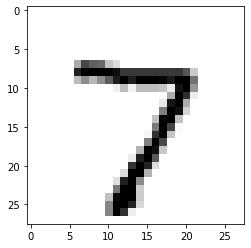

In [17]:
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [18]:
test_labels[0]

7